##### NSI Spécialité NSI Première - J.J.Dides nov.2021 - S.Roux janv.2022

# Algorithmes de tris

Dans ce notebook nous allons implémenter en Python, les deux algorithmes de tris vus en cours : **le tri par sélection et le tri par insertion**

## Tri par Sélection

Le tri par sélection parcours la liste de la gauche vers la droite, en maintenant sur la gauche une partie de la liste déjà triée et où les éléments sont rangés à leur place définitive.     
A chaque étape, on cherche le plus petit élément dans la partie de droite non triée de la liste, puis on l'échange avec l'élément le plus à gauche de cette partie non triée :

![](TriSelection.png)

Pour implémenter en Python cet algorithme, nous allons nous aider de l'algorithme construit en cours et **diviser les différentes étapes en plusieurs fonctions**.

### <font color=green> &#9998; Application</font>

<font color=green>Ecrire une fonction ``minimum(T, a)`` qui retourne **le rang** du plus petit élément de la liste ``T`` entre l'élément d'indice ``a`` et le dernier élément de la liste (inclus).</font>

<font color=green>Puis testez-la avec les listes crées ci-dessous</font>

In [35]:
def minimum(T, a) :
    # à remplir
    if len(T) == 0 :
        return None
    imini = a
    for i in range(a+1,len(T)) :
        if T[i] < T[imini] :
            imini = i
    return imini

# tests
l1 = [3,2,9,6,8,1]
l2 = [-2,0,5,7]
l3 = []

print(minimum(l1,0))
print(minimum(l2,0))
print(minimum(l3,0))

5
0
None


### <font color=green> &#9998; Application</font>

<font color=green>Ecrire une fonction ``echange(T, a, b)`` qui permute dans la liste ``T`` les éléments d'indice ``a`` et ``b``.</font>

<font color=green>Puis testez-la avec des nouvelles listes ou celles crées au-dessus.</font>

In [36]:
def echange(T, a, b) :
    # à remplir
    T[a], T[b] = T[b], T[a]
    return T

# tests
print(echange(l1,0,5))


[1, 2, 9, 6, 8, 3]


### <font color=green> &#9998; Application</font>

<font color=green>Ecrire maintenant la fonction ``tri_selection(T)`` qui effectue le tri de la liste ``T`` par sélection, en suivant l'algorithme écrit dans le cours et en utilisant les 2 fonctions ``minimum()`` et ``echange()``.</font>

In [37]:
def tri_selection(T) :
    # à remplir
    for i in range(len(T)) :
        imini = minimum(T,i)
        echange(T,imini,i)   
    return T

<font color=green>Tester cette fonction sur la liste ``T`` suivante :

In [38]:
# Soit la liste suivante (10 éléments entiers) à trier
T = [18, 3, 10, 25, 9, 5, 11, 13, 23, 8]

In [39]:
tri_selection(T)

[3, 5, 8, 9, 10, 11, 13, 18, 23, 25]

### Quelle est la complexité de l'algorithme de tri par sélection          

Essayons de mesurer la durée d'un tri par sélection.

*On fait varier la taille n de la liste ``T`` de 0 à 5000 et on stocke dans une liste les durées d'exécution de la fonction ``tri_selection(T)`` en milliseconde, mesurées à l'aide la la fonction ``perfcounter()`` du module time, qui retourne un temps en secondes :*

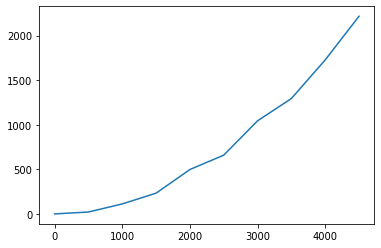

In [40]:
import matplotlib.pyplot as plt
from time import perf_counter
X, Y = [], []
plt.close()
for n in range(0, 5000, 500) :
    T = [i for i in range(2,n)]         # création d'un tableau désordonné de n entiers
    T.append(1)
    debut = perf_counter()              # mesure du temps avant et après tri de T
    tri_selection(T)
    fin = perf_counter()
    X.append(n)                         # construction des listes des valeurs de n et T(n)
    Y.append(1000*(fin-debut))
plt.plot(X, Y)                          # tracé de la courbe de variation de T(n) en fonction de n
plt.show()

On constate, au premier abord que l'exécution du script prend un temps significatif.          
On observe ensuite, sur la courbe obtenue, qu'un doublement de la longueur du tableau, multiplie sa durée de tri par 4 !

Plus rigoureusement, pour évaluer la performance d'un algorithme de tri, on peut compter, par exemple, le nombre de comparaisons de 2 éléments de la liste.      
Si la liste comprend ``n`` éléments et que, dans le pire des cas, le désordre initial est total, il faudra, pour ordonner l'ensemble du tableau :    

<center>$(n-1) + (n-2) + (n-3) + ... + 2 + 1 = n * (n-1) / 2 = n^2 / 2 - n / 2$ comparaisons</center>

En effet, ce tri implique **2 boucles imbriquées** :
* la boucle ``for`` de la fonction ``tri_selection()`` qui parcours la liste du début à la fin (n itérations)
* la boucle ``for`` de la fonction ``minimum()`` qui recherche le minimum d'une liste de (n-i itérations)

Vous pouvez copier le code de votre fonction ``minimum()`` à la place de son appel dans la fonction ``tri_selection()`` pour mieux voir les boucles imbriquées.

<div class="alert alert-danger">
    
Ce qui confirme que le tri par sélection est de **complexité quadratique** $O(n^2)$ !
</div>

Pour rappel, voici les courbes des fonctions $f(n) = n$ (complexité linéaire) et $f(n) = n^2$ (complexité quadratique) :

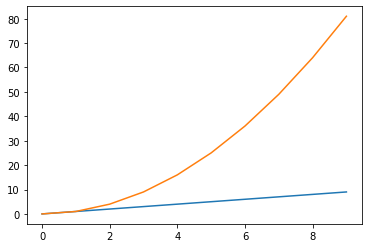

In [41]:
X = [i for i in range(0,10)]
YL = [i for i in range(0,10)]
YQ = [i**2 for i in range(0,10)]
plt.close()
plt.plot(X, YL, YQ)
plt.show()

## Tri par Insertion

Le tri par insertion parcours lui aussi la liste de la gauche vers la droite, en construisant sur la gauche une partie de la liste déjà triée.     
On va, à chaque étape, insérer le premier élément non encore trié parmi les éléments situés à sa gauche et déjà triés.    

![](TriInsertion.png)

<div class="alert alert-info">
    
Les **slices** sont des expressions du langage Python qui vous permettent en une ligne de code d’extraire des éléments d’une liste ou d’une chaîne de caractères. Exemples avec ``liste = [3,54,34,27,2,90]``

* ``liste[a:b]`` ==> correspond à la sous-liste des éléments d'indice a à b-1
* ``liste[0:3]`` ==> vaut ``[3, 54, 34]``
    </div>

Pour **implémenter en Python** cet algorithme :

Il faut disposer d'une fonction ``insere(liste, i)`` qui insère l'élément d'indice i (``liste[i]``) à la bonne blace dans la liste triée ``liste[0:i]``.

Pour cela on compare ``liste[i]`` aux éléments triés de ``liste[0:i]`` qui le précèdent. On repère le premier élément ``liste[j]`` plus grand que ``liste[i]``, décaler les éléments de ``liste[j:i]`` plus grands que ``liste[i]`` d'une position vers la droite et placer ``liste[i]`` à la position j ainsi libérée. ``liste[i]`` sera déplacé à une position qui conserve l'ordre croissant des éléments de ``liste[0:i+1]``

### <font color=green> &#9998; Application</font>

<font color=green>Compléter la fonction ``insere(liste, i)`` qui insère l'élément d'indice i à la bonne blace dans la partie de liste triée. Cette fonction retourne la liste après les modifications.</font>

<font color=green>Puis testez-la avec les jeux de tests en dessous.</font>

In [42]:
def insere(liste, i) :
    # tant que T[i] n'est pas à la bonne place dans T[0:i], on echange sa valeur avec celle de l'élément précédent.
    while i > 0 and liste[i] < liste[i-1] :
        liste[i], liste[i-1] = liste[i-1], liste[i]
        i -= 1
    return liste

In [43]:
l2 = [0,3,4,5,2,9]
assert insere(l2,4) == [0, 2, 3, 4, 5, 9]

l3 = [4,5,6,8,9,0,1]
assert insere(l3, 5) == [0, 4, 5, 6, 8, 9, 1]
assert insere(l3, 6) == [0, 1, 4, 5, 6, 8, 9]

### <font color=green> &#9998; Application</font>

<font color=green>Ecrire la fonction ``tri_insertion(T)`` qui effectue le tri de la liste T par insertion, en suivant l'algorithme vu en cours et en utilisant la fonction ``insere()``.</font>

<font color=green>Puis testez-la avec les jeux de tests en dessous.</font>

In [44]:
def tri_insertion(T) :
    # à remplir
    for i in range(1,len(T)) :
        insere(T,i)
    return T

<font color=green>Tester cette fonction ``tri_insertion(T)`` sur la liste L suivante.</font>

In [45]:
L = [18, 3, 10, 25, 9, 5, 11, 13, 23, 8]

# test de la fonction tri_insertion
print(tri_insertion(L))

[3, 5, 8, 9, 10, 11, 13, 18, 23, 25]


### Quelle est la complexité de l'algorithme de tri par insertion          

Essayons de mesurer la durée d'un tri par insertion.

*On fait varier la taille n de la liste T de 0 à 5000 et on stocke dans une liste les durées d'exécution de la fonction ``tri_insertion(T)`` en milliseconde, mesurée à l'aide la la fonction ``perfcounter()`` du module time, qui retourne un temps en secondes :*

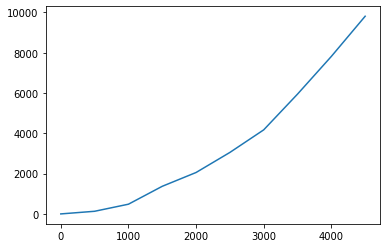

In [55]:
X, Y = [], []
plt.close()
for n in range(0, 5000, 500) :
    T = [n-i for i in range(n)]
    debut = perf_counter()
    tri_insertion(T)
    fin = perf_counter()
    X.append(n)
    Y.append(1000*(fin-debut))
plt.plot(X, Y)
plt.show()

On constate que l'exécution du script prend un temps significatif et, sur la courbe obtenue, qu'un doublement de la longueur de la liste, multiplie sa durée de tri par 4 !

En effet, comme pour le tri par sélection, ce tri implique 2 boucles imbriquées :
* la boucle ``for`` de la fonction ``tri_insertion()`` qui parcours la liste du début à la fin
* la boucle ``while`` de la fonction ``insere()`` qui parcourt les i premiers éléments de la liste (dans le pire des cas)

<center>$1 + 2 + 3 + ... + (n-2) + (n-1) =  n * (n-1) / 2 =  (n^2 - n) / 2$ comparaisons</center>

Vous pouvez copier le code de votre fonction ``insere()`` à la place de son appel dans la fonction ``tri_insertion()`` pour mieux voir les boucles imbriquées.

<div class="alert alert-danger">
    
Ce qui confirme que ce tri par insertion est de **complexité quadtarique** $O(n^2)$.
    </div>

On a vu qu'une complexité quadratique n'est pas une solution efficace. Il existe d'autres algorithmes de tri plus performants, qui seront étudiés en classe de terminale.

C'est le cas du tri fourni par Python dans la fonction ``sorted()`` : 

In [47]:
T = [18, 3, 10, 25, 9, 5, 11, 13, 23, 8]

In [48]:
print(sorted(T))

[3, 5, 8, 9, 10, 11, 13, 18, 23, 25]


Evaluons son efficacité : 

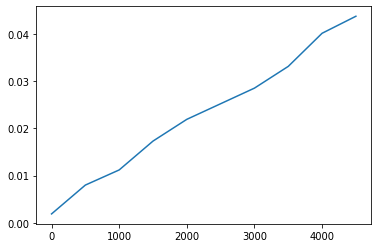

In [59]:
X, Y = [], []
plt.close()
for n in range(0, 5000, 500) :
    T = [n-i for i in range(n)]
    debut = perf_counter()
    sorted(T)
    fin = perf_counter()
    X.append(n)
    Y.append(1000*(fin-debut))
plt.plot(X, Y)
plt.show()

Le tri est quasiment instantané, cette fonction à une complexité de $O(n.log(n))$ dans le pire des cas. C'est actuellement la complexité la plus basse pour les algorithmes de tri, le tri de Python est donc optimal !